In [ ]:
 !pip install keras.utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## import the required Libraries

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split


from keras.models import Model
from keras.layers import Input, Embedding, SpatialDropout1D, Dropout, Conv1D, MaxPool1D, Flatten, concatenate, Dense, \
    LSTM, Bidirectional, Activation, MaxPooling1D, Add, GRU, GlobalAveragePooling1D, GlobalMaxPooling1D, RepeatVector, \
    TimeDistributed, Permute, multiply, Lambda, add, Masking, BatchNormalization, Softmax, Reshape, ReLU, \
    ZeroPadding1D, subtract
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
import tensorflow.keras.backend as K
import tensorflow as tf
from keras import backend as K, initializers, regularizers, constraints


# Import our dependencies
import tensorflow as tf
import pandas as pd
import tensorflow_hub as hub
import os
import re
from keras import backend as K
import keras.layers as layers
from keras.models import Model, load_model
from tensorflow.keras.layers import Layer, InputSpec
import numpy as np

from statistics import mode

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
%matplotlib inline
import tensorflow as tf

# Load Huggingface transformers
from transformers import TFBertModel,  BertConfig, BertTokenizerFast, TFAutoModel

# Then what you need from tensorflow.keras
from tensorflow.keras.layers import Input, Dropout, Dense, GlobalAveragePooling1D
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from tensorflow.python.keras import backend as K
from tensorflow.python.keras.metrics import Metric
from tensorflow.python.keras.utils import metrics_utils
from tensorflow.python.ops import init_ops
from tensorflow.python.ops import math_ops
from tensorflow.python.keras.utils.generic_utils import to_list
import tensorflow_hub as hub



import re
import nltk
from nltk.corpus import stopwords

# neural
from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences

from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential

#Metrics
from sklearn.metrics import balanced_accuracy_score

from sklearn.feature_extraction.text import TfidfVectorizer
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier

> ## **First Approach :**
In this part of code, We are going to mix both Laptop and Restaurant Dataset in order to increase and to test the AEAT-LSTM ability to Distinguish between different aspects and their polarity, the model will be able to return the polarity based on the sentence and a given aspect , different aspects are input separately

### Load the Restaurant Dataset ( Dataframe )

> what we are going to do it to load both restaurant and laptop datasets, and then we will concatenate them in order to increase the size of our dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
restaurant_df = pd.read_csv("/content/drive/MyDrive/lstm/Restaurants_Train_v2.csv", encoding='utf8')
# restaurant_df = pd.read_xml("/content/drive/MyDrive/archive (2) (1)/SemEval'14-ABSA-TrainData_v2 & AnnotationGuidelines/Restaurants_Train_v2.xml")

## load the laptop dataset ( dataframe )

In [ ]:
laptop_df = pd.read_csv("/content/drive/MyDrive/lstm/Laptop_Train_v2.csv", encoding='utf8')
# laptop_df = pd.read_xml("/content/drive/MyDrive/archive (2) (1)/SemEval'14-ABSA-TrainData_v2 & AnnotationGuidelines/Laptop_Train_v2.xml")

### the head of the dataframes

> display the first rows of our both datasets

In [ ]:
restaurant_df

,id,Sentence,Aspect Term,polarity,from,to
0,3121,But the staff was so horrible to us.,staff,negative,8,13
1,2777,"To be completely fair, the only redeeming fact...",food,positive,57,61
2,1634,"The food is uniformly exceptional, with a very...",food,positive,4,8
3,1634,"The food is uniformly exceptional, with a very...",kitchen,positive,55,62
4,1634,"The food is uniformly exceptional, with a very...",menu,neutral,141,145
...,...,...,...,...,...,...
3688,671,Each table has a pot of boiling water sunken i...,pot of boiling water,neutral,17,37
3689,671,Each table has a pot of boiling water sunken i...,meats,neutral,99,104
3690,671,Each table has a pot of boiling water sunken i...,vegetables,neutral,114,124
3691,671,Each table has a pot of boiling water sunken i...,rice,neutral,130,134


In [ ]:
laptop_df.head()

,id,Sentence,Aspect Term,polarity,from,to
0,2339,I charge it at night and skip taking the cord ...,cord,neutral,41,45
1,2339,I charge it at night and skip taking the cord ...,battery life,positive,74,86
2,1316,The tech guy then said the service center does...,service center,negative,27,41
3,1316,The tech guy then said the service center does...,"""sales"" team",negative,109,121
4,1316,The tech guy then said the service center does...,tech guy,neutral,4,12


### Concatenate the two dataframes so we can test the model on a different fields( Restaurant and Laptops)

In [ ]:
#df = restaurant_df.append(laptop_df, ignore_index=True)
#df = restaurant_df
df = laptop_df

> display the dataset

In [ ]:
#display the dataset
df

,id,Sentence,Aspect Term,polarity,from,to
0,2339,I charge it at night and skip taking the cord ...,cord,neutral,41,45
1,2339,I charge it at night and skip taking the cord ...,battery life,positive,74,86
2,1316,The tech guy then said the service center does...,service center,negative,27,41
3,1316,The tech guy then said the service center does...,"""sales"" team",negative,109,121
4,1316,The tech guy then said the service center does...,tech guy,neutral,4,12
...,...,...,...,...,...,...
2353,2272,We also use Paralles so we can run virtual mac...,Windows Server Enterprise 2003,neutral,104,134
2354,2272,We also use Paralles so we can run virtual mac...,Windows Server 2008 Enterprise,neutral,140,170
2355,848,"How Toshiba handles the repair seems to vary, ...",repair,conflict,24,30
2356,848,"How Toshiba handles the repair seems to vary, ...",repair,positive,130,136


In [ ]:
from wordcloud import WordCloud
wordcloud2 = WordCloud().generate(' '.join(df['Sentence'])),

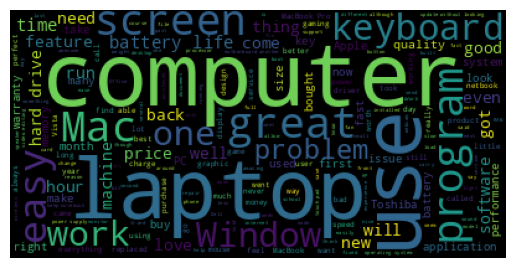

In [ ]:
text3 = ' '.join(df['Sentence'])
wordcloud2 = WordCloud().generate(text3)
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [ ]:
## display the columns of the dataframe
df.columns

Index(['id', 'Sentence', 'Aspect Term', 'polarity', 'from', 'to'], dtype='object')

In [ ]:
## display the null values in the polarity column
df['polarity'].isna().sum()

0

In [ ]:
## change the labels to integers for the training phase
df['polarity'][df["polarity"] == 'negative'] = 0
df['polarity'][df["polarity"] == 'positive'] = 1
df['polarity'][df["polarity"] == 'neutral'] = 2


<ipython-input-52-378d21b94d4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'][df["polarity"] == 'negative'] = 0
<ipython-input-52-378d21b94d4a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'][df["polarity"] == 'positive'] = 1
<ipython-input-52-378d21b94d4a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'][df["polarity"] == 'neutral'] = 2


In [ ]:
df.head()

,id,Sentence,Aspect Term,polarity,from,to
0,2339,I charge it at night and skip taking the cord ...,cord,2,41,45
1,2339,I charge it at night and skip taking the cord ...,battery life,1,74,86
2,1316,The tech guy then said the service center does...,service center,0,27,41
3,1316,The tech guy then said the service center does...,"""sales"" team",0,109,121
4,1316,The tech guy then said the service center does...,tech guy,2,4,12


In [ ]:
#Delete the useless Columns
train_df = df.drop(['id','from','to'], axis = 1)

In [ ]:
Aspects_term = train_df['polarity'].unique()
Aspects_term[:20]

array([2, 1, 0, 'conflict'], dtype=object)

In [ ]:
train_df.head()

,Sentence,Aspect Term,polarity
0,I charge it at night and skip taking the cord ...,cord,2
1,I charge it at night and skip taking the cord ...,battery life,1
2,The tech guy then said the service center does...,service center,0
3,The tech guy then said the service center does...,"""sales"" team",0
4,The tech guy then said the service center does...,tech guy,2


In [ ]:
train_df[train_df.polarity == 'conflict']

,Sentence,Aspect Term,polarity
30,"-No backlit keyboard, but not an issue for me.",keyboard,conflict
39,"I did have to replace the battery once, but th...",battery,conflict
170,"Yes, they cost more, but they more than make u...",cost,conflict
177,It absolutely is more expensive than most PC l...,pricetag,conflict
241,"It has no camera but, I can always buy and ins...",camera,conflict
269,Small screen somewhat limiting but great for t...,screen,conflict
321,The video chat is the only thing that is iffy ...,quality,conflict
375,A longer battery life would have been great - ...,battery life,conflict
438,"The Apple will run Internet Explorer, but at a...",Internet Explorer,conflict
481,The macbook rarely requires a hard reboot.,hard reboot,conflict


In [ ]:
## Delete the polarity than contains CONFLICT, Means that the sentence contains more than one sentiment when it comes to the aspect term
train_df.drop(train_df[train_df.polarity == 'conflict'].index, inplace = True)

In [ ]:
## our new Dataframe
train_df

,Sentence,Aspect Term,polarity
0,I charge it at night and skip taking the cord ...,cord,2
1,I charge it at night and skip taking the cord ...,battery life,1
2,The tech guy then said the service center does...,service center,0
3,The tech guy then said the service center does...,"""sales"" team",0
4,The tech guy then said the service center does...,tech guy,2
...,...,...,...
2352,We also use Paralles so we can run virtual mac...,Windows 7 Home Premium,2
2353,We also use Paralles so we can run virtual mac...,Windows Server Enterprise 2003,2
2354,We also use Paralles so we can run virtual mac...,Windows Server 2008 Enterprise,2
2356,"How Toshiba handles the repair seems to vary, ...",repair,1


In [ ]:
## Training data shape
df.shape

(2358, 6)

<Axes: >

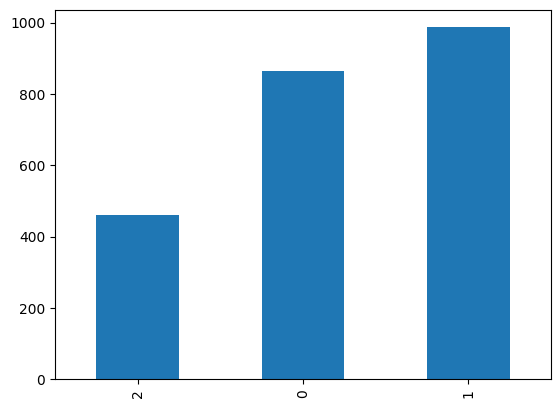

In [ ]:
# Polarities distribution in our dataset
train_df.polarity.value_counts().sort_values().plot(kind = 'bar')


In [ ]:
## Convert polarity Values to Integers
train_df["polarity"] = pd.to_numeric(train_df["polarity"],errors='coerce')


In [ ]:
## Display our training Dataframe
train_df.head()

,Sentence,Aspect Term,polarity
0,I charge it at night and skip taking the cord ...,cord,2
1,I charge it at night and skip taking the cord ...,battery life,1
2,The tech guy then said the service center does...,service center,0
3,The tech guy then said the service center does...,"""sales"" team",0
4,The tech guy then said the service center does...,tech guy,2


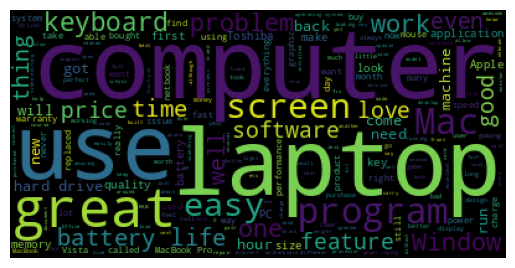

In [ ]:
text3 = ' '.join(train_df['Sentence'])
wordcloud2 = WordCloud().generate(text3)
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [ ]:
## drop the NAN Values from the dataframe
train_df.dropna(subset = ['polarity'], inplace = True)

In [ ]:
## Verify if the dataframe contains any NAN Values
train_df.isna().sum()

Sentence       0
Aspect Term    0
polarity       0
dtype: int64

In [ ]:
## Split the Dataset into Training and Testing Datasets
X_train, X_test, y_train, y_test = train_test_split(train_df,train_df['polarity'],stratify=train_df['polarity'], test_size=0.2, random_state=1)



In [ ]:
# the size of the training dataset
X_train.Sentence.size

1850

In [ ]:
# Display the shape of the target values!
y_train.shape

(1850,)

In [ ]:
NUM_WORDS = 100000 ## MAx of words to keep, based on word frequency.
EMBEDDING_SIZE = 128 ## the length of the Vector the will

## Embedding code

In [ ]:
tokenizer = Tokenizer(num_words=NUM_WORDS,
                      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                      lower=True, )
## Fit_on_texts : Updates internal vocabulary based on a list of texts.
tokenizer.fit_on_texts(list(X_train.Sentence))
text_X_train_tokenized = tokenizer.texts_to_sequences(X_train.Sentence) # list of tokenized sentences
Aspect_X_train_tokenized = tokenizer.texts_to_sequences(X_train['Aspect Term']) # list of tokenized sentences
text_X_test_tokenized = tokenizer.texts_to_sequences(X_test.Sentence) # list of tokenized sentences
Aspect_X_test_tokenized = tokenizer.texts_to_sequences(X_test['Aspect Term']) # list of tokenized sentences

In [ ]:
##Maximum length of sentences
Max_Len =  max([len(one_title) for one_title in text_X_train_tokenized])
Max_Len

77

In [ ]:
## Pads sequences(or sentences) to the same length.


text_X_train_padded = pad_sequences(text_X_train_tokenized, maxlen=Max_Len)
aspect_X_train_padded = pad_sequences(Aspect_X_train_tokenized, maxlen=1)

text_X_test_padded = pad_sequences(text_X_test_tokenized, maxlen=Max_Len)
aspect_X_test_padded = pad_sequences(Aspect_X_test_tokenized, maxlen=1)


In [ ]:
## the embedding presentation of the aspects
aspect_X_train_padded[0]

array([1186], dtype=int32)

In [ ]:
## the embedding presentation of the Sentences

text_X_train_padded[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,   29, 1186,  176],
      dtype=int32)

In [ ]:
## Concatenate the Embedding presentation of the sentences and aspects to Create training and testing dataset
train_data =  [text_X_train_padded,aspect_X_train_padded]
test_data =   [text_X_test_padded,aspect_X_test_padded]

In [ ]:
test_data[1][0]

array([1487], dtype=int32)

## Attention Mechanism

In [ ]:

# modified based on `https://gist.github.com/cbaziotis/7ef97ccf71cbc14366835198c09809d2`
class Attention(Layer):
    """
    Attention operation, with a context/query vector, for temporal data.
    Supports Masking.
    Follows the work of Yang et al. [https://www.cs.cmu.edu/~diyiy/docs/naacl16.pdf]
    "Hierarchical Attention Networks for Document Classification"
    by using a context vector to assist the attention
    # Input shape
        3D tensor with shape: `(samples, steps, features)`.
    # Output shape
        2D tensor with shape: `(samples, features)`.
    How to use:
    Just put it on top of an RNN Layer (GRU/LSTM/SimpleRNN) with return_sequences=True.
    The dimensions are inferred based on the output shape of the RNN.
 e: The layer has been tested with Keras 2.0.6
    Example:
        model.add(LSTM(64, return_sequences=True))
        model.add(AttentionWithContext())
        # next add a Dense layer (for classification/regression) or whatever...
    """

    def __init__(self, W_regularizer=None, u_regularizer=None, b_regularizer=None, W_constraint=None,
                 u_constraint=None, b_constraint=None, use_W=True, use_bias=False, return_self_attend=False,
                 return_attend_weight=True, **kwargs):
        self.supports_masking = True

        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.u_regularizer = regularizers.get(u_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.u_constraint = constraints.get(u_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.use_W = use_W
        self.use_bias = use_bias
        self.return_self_attend = return_self_attend    # whether perform self attention and return it
        self.return_attend_weight = return_attend_weight    # whether return attention weight
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        if self.use_W:
            self.W = self.add_weight(shape=(input_shape[-1], input_shape[-1],),  initializer=self.init,
                                     name='{}_W'.format(self.name), regularizer=self.W_regularizer,
                                     constraint=self.W_constraint)
        if self.use_bias:
            self.b = self.add_weight(shape=(input_shape[1],), initializer='zero', name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer, constraint=self.b_constraint)

        self.u = self.add_weight(shape=(input_shape[-1],), initializer=self.init, name='{}_u'.format(self.name),
                                 regularizer=self.u_regularizer, constraint=self.u_constraint)

        super(Attention, self).build(input_shape)

    def compute_mask(self, input, input_mask=None):
        # do not pass the mask to the next layers
        return None

    def call(self, x, mask=None):
        if self.use_W:
            x = K.tanh(K.dot(x, self.W))

        ait = Attention.dot_product(x, self.u)
        if self.use_bias:
            ait += self.b

        a = K.exp(ait)

        # apply mask after the exp. will be re-normalized next
        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            a *= K.cast(mask, K.floatx())

        # in some cases especially in the early stages of training the sum may be almost zero
        # and this results in NaN's. A workaround is to add a very small positive number ε to the sum.
        # a /= K.cast(K.sum(a, axis=1, keepdims=True), K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        if self.return_self_attend:
            attend_output = K.sum(x * K.expand_dims(a), axis=1)
            if self.return_attend_weight:
                return [attend_output, a]
            else:
                return attend_output
        else:
            return a

    def compute_output_shape(self, input_shape):
        if self.return_self_attend:
            if self.return_attend_weight:
                return [(input_shape[0], input_shape[-1]), (input_shape[0], input_shape[1])]
            else:
                return input_shape[0], input_shape[-1]
        else:
            return input_shape[0], input_shape[1]

    @staticmethod
    def dot_product(x, kernel):
        """
        Wrapper for dot product operation, in order to be compatible with both
        Theano and Tensorflow
        Args:
            x (): input
            kernel (): weights
        Returns:
        """
        if K.backend() == 'tensorflow':
            return K.squeeze(K.dot(x, K.expand_dims(kernel)), axis=-1)
        else:
            return K.dot(x, kernel)

## LSTM with Aspect Embedding

In [ ]:
def ae_lstm(lstm_units = 512):
    input_text = Input(shape=(Max_Len,))
    input_aspect = Input(shape=(1,),)

    word_embedding = Embedding(NUM_WORDS, EMBEDDING_SIZE, input_length=Max_Len)
    text_embed = SpatialDropout1D(0.2)(word_embedding(input_text))

    asp_embedding = Embedding(NUM_WORDS, EMBEDDING_SIZE, input_length=Max_Len)
    aspect_embed = asp_embedding(input_aspect)


    aspect_embed = Flatten()(aspect_embed)  # reshape to 2d
    repeat_aspect = RepeatVector(Max_Len)(aspect_embed)  # repeat aspect for every word in sequence

    input_concat = concatenate([text_embed, repeat_aspect], axis=-1)
    hidden = LSTM(lstm_units)(input_concat)
    Dense_layer  = Dense(128, activation='relu')(hidden)
    output_layer = Dense(3, activation='softmax')(Dense_layer)
    return Model([input_text, input_aspect], output_layer)

In [ ]:
ae_lstm_model = ae_lstm()
ae_lstm_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 77)]         0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 128)       12800000    ['input_2[0][0]']                
                                                                                                  
 embedding (Embedding)          (None, 77, 128)      12800000    ['input_1[0][0]']                
                                                                                              

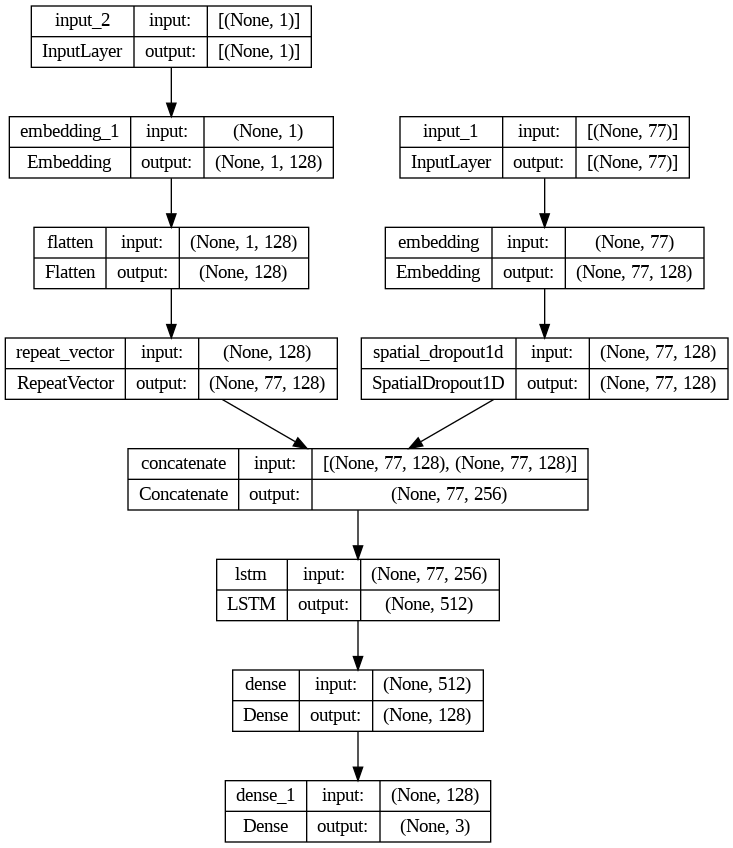

In [ ]:
dot_img_file = 'model_1.png'
tf.keras.utils.plot_model(ae_lstm_model, to_file=dot_img_file, show_shapes=True)


In [ ]:
y_train.size

1850

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                                    patience = 1,
                                                    verbose=1,
                                                    factor=0.1,
                                                    min_lr=0.000001)
from tensorflow import keras

opt = keras.optimizers.Adam(learning_rate=0.01)

ae_lstm_model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
history =  ae_lstm_model.fit(x = train_data, y = y_train,validation_data = (test_data, y_test), batch_size=16, epochs=20, callbacks = [learning_rate_reduction])

Epoch 1/20
116/116 [==============================] - 246s 2s/step - loss: 1.3225 - accuracy: 0.4303 - val_loss: 1.0933 - val_accuracy: 0.4276 - lr: 0.0100
Epoch 2/20
116/116 [==============================] - 233s 2s/step - loss: 0.9619 - accuracy: 0.5724 - val_loss: 0.9596 - val_accuracy: 0.5486 - lr: 0.0100
Epoch 3/20
116/116 [==============================] - 233s 2s/step - loss: 0.8789 - accuracy: 0.6584 - val_loss: 0.9449 - val_accuracy: 0.5875 - lr: 0.0100
Epoch 4/20
116/116 [==============================] - ETA: 0s - loss: 0.7502 - accuracy: 0.6881
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
116/116 [==============================] - 233s 2s/step - loss: 0.7502 - accuracy: 0.6881 - val_loss: 0.9447 - val_accuracy: 0.5788 - lr: 0.0100
Epoch 5/20
116/116 [==============================] - ETA: 0s - loss: 0.6419 - accuracy: 0.7265
Epoch 5: ReduceLROnPlateau reducing learning rate to 9.999999310821295e-05.
116/116 [==============================] - 

In [ ]:
text_X_test_padded[6].shape

(77,)

In [ ]:
val_data =   [text_X_test_padded[6].reshape(1,Max_Len),aspect_X_test_padded[6]]
print(val_data[0].shape)
ae_lstm_model.predict(val_data)

(1, 77)
1/1 [==============================] - 1s 823ms/step


array([[0.67862934, 0.07364123, 0.24772939]], dtype=float32)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [ ]:
print("Evaluate on test data")
results = ae_lstm_model.evaluate(x = test_data , y = y_test )
print("test loss, test acc:", results)
print("Accuracy of the model is - " , results[1]*100 , "%")

Evaluate on test data
15/15 [==============================] - 5s 346ms/step - loss: 1.0143 - accuracy: 0.5875
test loss, test acc: [1.0142523050308228, 0.5874729752540588]
Accuracy of the model is -  58.747297525405884 %


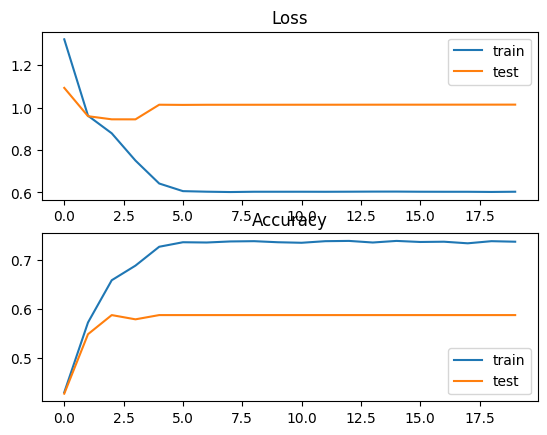

In [ ]:
from matplotlib import pyplot

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

##  Attention-based LSTM (AT-LSTM)

In [ ]:
def at_lstm(lstm_units = 512):
        input_text = Input(shape=(Max_Len,))
        input_aspect = Input(shape=(1,),)

        word_embedding = Embedding(NUM_WORDS, EMBEDDING_SIZE, input_length=Max_Len)
        text_embed = SpatialDropout1D(0.2)(word_embedding(input_text))

        asp_embedding = Embedding(NUM_WORDS, EMBEDDING_SIZE, input_length=Max_Len)
        aspect_embed = asp_embedding(input_aspect)
        aspect_embed = Flatten()(aspect_embed)  # reshape to 2d
        repeat_aspect = RepeatVector(Max_Len)(aspect_embed)  # repeat aspect for every word in sequence
        hidden_vecs = LSTM(lstm_units, return_sequences=True)(text_embed)  # hidden vectors output by lstm
        concat = concatenate([hidden_vecs, repeat_aspect], axis=-1)  # mask after concatenate will be same as hidden_out's mask
        print(concat.shape)
         # apply attention mechanism
        attend_weight = Attention()(concat)
        attend_weight_expand = Lambda(lambda x: K.expand_dims(x))(attend_weight)
        attend_hidden = multiply([hidden_vecs, attend_weight_expand])
        attend_hidden = Lambda(lambda x: K.sum(x, axis=1))(attend_hidden)
        Dense_layer  = Dense(128, activation='relu')(attend_hidden)
        output_layer = Dense(3, activation='softmax')(Dense_layer)
        return Model([input_text, input_aspect], output_layer)

In [ ]:
at_lstm_model =  at_lstm()
at_lstm_model.summary()

(None, 77, 640)


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 77)]         0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 77, 128)      12800000    ['input_3[0][0]']                
                                                                                                  
 embedding_3 (Embedding)        (None, 1, 128)       12800000    ['input_4[0][0]']                
                                                                                            

## model training


In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                                    patience = 1,
                                                    verbose=1,
                                                    factor=0.1,
                                                    min_lr=0.000001)
opt = keras.optimizers.Adam(learning_rate=0.01)

at_lstm_model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
at_lstm_model .fit(x = train_data, y = y_train,validation_data = (test_data, y_test), batch_size=32, epochs=10, callbacks = [learning_rate_reduction])

Epoch 1/10
58/58 [==============================] - 145s 2s/step - loss: 1.1491 - accuracy: 0.3870 - val_loss: 1.0591 - val_accuracy: 0.3737 - lr: 0.0100
Epoch 2/10
58/58 [==============================] - 139s 2s/step - loss: 1.0595 - accuracy: 0.4168 - val_loss: 1.0522 - val_accuracy: 0.4276 - lr: 0.0100
Epoch 3/10
58/58 [==============================] - ETA: 0s - loss: 1.0590 - accuracy: 0.4227
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
58/58 [==============================] - 138s 2s/step - loss: 1.0590 - accuracy: 0.4227 - val_loss: 1.0654 - val_accuracy: 0.4276 - lr: 0.0100
Epoch 4/10
58/58 [==============================] - ETA: 0s - loss: 1.0595 - accuracy: 0.4276
Epoch 4: ReduceLROnPlateau reducing learning rate to 9.999999310821295e-05.
58/58 [==============================] - 140s 2s/step - loss: 1.0595 - accuracy: 0.4276 - val_loss: 1.0538 - val_accuracy: 0.4276 - lr: 1.0000e-03
Epoch 5/10
58/58 [==============================] - ETA: 0s - 

## Model Evaluation

In [ ]:
val_data =   [text_X_test_padded[6].reshape(1,Max_Len),aspect_X_test_padded[6]]
at_lstm_model.predict(val_data)

1/1 [==============================] - 1s 539ms/step


array([[0.36457074, 0.41723126, 0.21819803]], dtype=float32)

In [ ]:
print("Evaluate on test data")
results = at_lstm_model.evaluate(x = test_data , y = y_test )
print("test loss, test acc:", results)
print("Accuracy of the model is - " , results[1]*100 , "%")

Evaluate on test data
15/15 [==============================] - 4s 251ms/step - loss: 1.0533 - accuracy: 0.4276
test loss, test acc: [1.0533241033554077, 0.42764580249786377]
Accuracy of the model is -  42.76458024978638 %


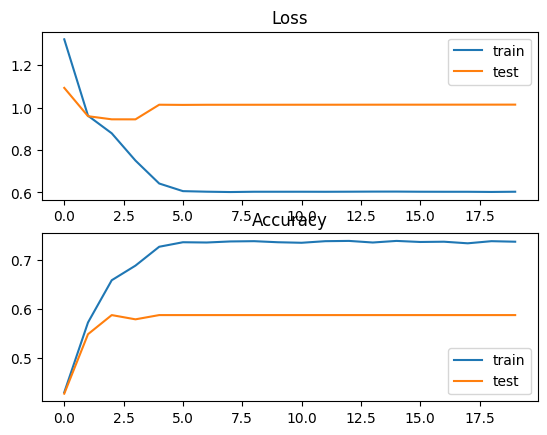

In [ ]:
from matplotlib import pyplot

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

## Attention-based LSTM with Aspect Embedding (ATAE-LSTM)

In [ ]:
# attention-based lstm with aspect embedding
def atae_lstm(lstm_units = 128):
    input_text = Input(shape=(Max_Len,))
    input_aspect = Input(shape=(1,),)

    word_embedding = Embedding(NUM_WORDS, EMBEDDING_SIZE, input_length=Max_Len)
    text_embed = SpatialDropout1D(0.2)(word_embedding(input_text))

    asp_embedding = Embedding(NUM_WORDS, EMBEDDING_SIZE, input_length=Max_Len)

    aspect_embed = asp_embedding(input_aspect)
    aspect_embed = Flatten()(aspect_embed)  # reshape to 2d
    repeat_aspect = RepeatVector(Max_Len)(aspect_embed)  # repeat aspect for every word in sequence

    input_concat = concatenate([text_embed, repeat_aspect], axis=-1)
    print(input_concat.shape)
    hidden_vecs, state_h, _ = LSTM(lstm_units, return_sequences=True, return_state=True)(input_concat)
    concat = concatenate([hidden_vecs, repeat_aspect], axis=-1)

    # apply attention mechanism
    attend_weight = Attention()(concat)
    attend_weight_expand = Lambda(lambda x: K.expand_dims(x))(attend_weight)
    attend_hidden = multiply([hidden_vecs, attend_weight_expand])
    attend_hidden = Lambda(lambda x: K.sum(x, axis=1))(attend_hidden)

    attend_hidden_dense = Dense(lstm_units)(attend_hidden)
    last_hidden_dense = Dense(lstm_units)(state_h)
    final_output = Activation('tanh')(add([attend_hidden_dense, last_hidden_dense]))

    return Model([input_text, input_aspect], final_output)

In [ ]:
atae_lstm_model =  atae_lstm()
atae_lstm_model.summary()

(None, 77, 256)
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 77)]         0           []                               
                                                                                                  
 embedding_5 (Embedding)        (None, 1, 128)       12800000    ['input_6[0][0]']                
                                                                                                  
 embedding_4 (Embedding)        (None, 77, 128)      12800000    ['input_5[0][0]']                
                                                                            

## Model Training

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                                    patience = 1,
                                                    verbose=1,
                                                    factor=0.1,
                                                    min_lr=0.000001)
atae_lstm_model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
atae_lstm_model .fit(x = train_data, y = y_train,validation_data = (test_data, y_test), batch_size=32, epochs=50, callbacks = [learning_rate_reduction])

Epoch 1/50
58/58 [==============================] - 61s 978ms/step - loss: 1.5465 - accuracy: 0.4741 - val_loss: 0.9750 - val_accuracy: 0.5508 - lr: 0.0010
Epoch 2/50
58/58 [==============================] - 54s 934ms/step - loss: 0.8707 - accuracy: 0.6811 - val_loss: 1.4092 - val_accuracy: 0.6285 - lr: 0.0010
Epoch 3/50
58/58 [==============================] - 56s 961ms/step - loss: 0.7486 - accuracy: 0.8135 - val_loss: 2.9212 - val_accuracy: 0.6523 - lr: 0.0010
Epoch 4/50
58/58 [==============================] - ETA: 0s - loss: 2.7812 - accuracy: 0.4886
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
58/58 [==============================] - 54s 938ms/step - loss: 2.7812 - accuracy: 0.4886 - val_loss: 4.8660 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 5/50
58/58 [==============================] - ETA: 0s - loss: 4.8599 - accuracy: 0.0000e+00
Epoch 5: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
58/58 [==============================

## Model Evaluation

In [ ]:
print("Evaluate on test data")
results = atae_lstm_model.evaluate(x = test_data , y = y_test )
print("test loss, test acc:", results)
print("Accuracy of the model is - " , results[1]*100 , "%")

Evaluate on test data
15/15 [==============================] - 1s 59ms/step - loss: 4.8520 - accuracy: 0.0000e+00
test loss, test acc: [4.8520307540893555, 0.0]
Accuracy of the model is -  0.0 %


> ## **Second Approach :**
In this part of code, We are going to use the AspectCategory as a one hot_encoded output, the input of the model would the sentence and the output would be the probability for each aspect Category.

In [ ]:
from collections import Counter
import time
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
file_path = '/content/drive/MyDrive/lstm/Restaurants_Train_v2.xml'

In [ ]:
import xml.etree.ElementTree as ET


In [ ]:
tree = ET.parse(file_path)
root = tree.getroot()

In [ ]:
tags_list = [elem.tag for elem in root.iter()]
len(tags_list)

18551

In [ ]:
aspect_categories = []
text = []
dfcols = ['Sentence', 'Aspect_Category', 'polarity' ]
for sentence in root.iter("sentences"):
    for aspect_category in sentence.iter("aspectCategory"):
            #print(type(abstract.text))
        aspect_categories.append(aspect_category.attrib)
    for txt in sentence.iter("text"):
        #print(type(abstract.text))
        text.append(txt.text)

In [ ]:
aspect_categories[0]['category']

'service'

In [ ]:
ss = [pip['category'] for pip in aspect_categories]
set(ss)

{'ambience', 'anecdotes/miscellaneous', 'food', 'price', 'service'}

In [ ]:
aspect_categories = []
text = []
dfcols = ['Sentence', 'Aspect_Category', 'polarity' ]
for sentence in root.iter("sentences"):
    for aspect in sentence.iter("aspectCategories"):
        aspects = []
        for aspect_category in aspect.iter("aspectCategory"):
            #print(type(abstract.text))
            aspects.append(aspect_category.attrib)
        aspect_categories.append(aspects)
    for txt in sentence.iter("text"):
        #print(type(abstract.text))
        text.append(txt.text)
listt = []
category_list = []
polarity_list = []
for aspects in aspect_categories:
    listt = []
    category_list.append(listt)
    for aspect in aspects:
        listt.append(aspect['category'])

for polarities in aspect_categories:
    listt = []
    polarity_list.append(listt)
    for aspect in polarities:
        listt.append(aspect['polarity'])

dataframe_list = list(zip(text,category_list,polarity_list))
df_xml = pd.DataFrame(dataframe_list,columns=dfcols)
# df_xml['Diseases']
# countt.append(2)
#print(NameOfSubstance.text)
#./PubmedArticleSet/PubmedArticle/MeshHeadingList/MeshHeading/DescriptorName

In [ ]:
df_xml['hot_enocded'] = pd.NaT


In [ ]:
df_xml['hot_enocded'] = df_xml['hot_enocded'].astype('object')
for i in np.arange(3041):
    df_xml.at[i, 'hot_enocded'] =  [3,3,3,3,3]

In [ ]:
df_xml

,Sentence,Aspect_Category,polarity,hot_enocded
0,But the staff was so horrible to us.,[service],[negative],"[3, 3, 3, 3, 3]"
1,"To be completely fair, the only redeeming fact...","[food, anecdotes/miscellaneous]","[positive, negative]","[3, 3, 3, 3, 3]"
2,"The food is uniformly exceptional, with a very...",[food],[positive],"[3, 3, 3, 3, 3]"
3,Where Gabriela personaly greets you and recomm...,[service],[positive],"[3, 3, 3, 3, 3]"
4,"For those that go once and don't enjoy it, all...",[anecdotes/miscellaneous],[positive],"[3, 3, 3, 3, 3]"
...,...,...,...,...
3036,But that is highly forgivable.,[anecdotes/miscellaneous],[positive],"[3, 3, 3, 3, 3]"
3037,"From the appetizers we ate, the dim sum and ot...",[food],[positive],"[3, 3, 3, 3, 3]"
3038,"When we arrived at 6:00 PM, the restaurant was...",[anecdotes/miscellaneous],[neutral],"[3, 3, 3, 3, 3]"
3039,Each table has a pot of boiling water sunken i...,[food],[neutral],"[3, 3, 3, 3, 3]"


In [ ]:
from wordcloud import WordCloud
wordcloud2 = WordCloud().generate(' '.join(df_xml['Sentence'])),

In [ ]:
wordcloud2 = WordCloud().generate(' '.join(df_xml['Sentence'])),

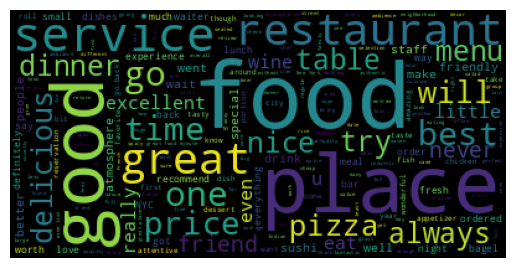

In [ ]:
text3 = ' '.join(df_xml['Sentence'])
wordcloud2 = WordCloud().generate(text3)
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

## data preparation

### the Idea here is to create an output the contains all the aspects and their polarities, for example if the aspect concerned is in the sentence, the model output needs to be 1 ( if the polarity is positive) 0 if the polarity is negative and 2 if the sentence doesn't contain the aspect.

In [ ]:
#{'ambience', 'anecdotes/miscellaneous', 'food', 'price', 'service'}

#initialize the target aspects as absents in the sentence, and whenever we find an aspect in the data we'll replace it by it's polarity
aspects_terget_data = [2,2,2,2,2]
for i in np.arange(3041) :
    for aspect in np.arange(len(df_xml.Aspect_Category[i])):
        if 'service' in df_xml.Aspect_Category[i]:
            if df_xml.polarity[i][df_xml.Aspect_Category[i].index('service')] == 'positive' :
                df_xml.hot_enocded[i][0] = 1
            if df_xml.polarity[i][df_xml.Aspect_Category[i].index('service')] == 'negative' :
                df_xml.hot_enocded[i][0] = 0
            if df_xml.polarity[i][df_xml.Aspect_Category[i].index('service')] == 'neutral' :
                df_xml.hot_enocded[i][0] = 2
        if 'anecdotes/miscellaneous' in df_xml.Aspect_Category[i]:
            if df_xml.polarity[i][df_xml.Aspect_Category[i].index('anecdotes/miscellaneous')] == 'positive' :
                df_xml.hot_enocded[i][1] = 1
            if df_xml.polarity[i][df_xml.Aspect_Category[i].index('anecdotes/miscellaneous')] == 'negative' :
                df_xml.hot_enocded[i][1] = 0
            if df_xml.polarity[i][df_xml.Aspect_Category[i].index('anecdotes/miscellaneous')] == 'neutral' :
                df_xml.hot_enocded[i][1] = 2
        if 'food' in df_xml.Aspect_Category[i]:
            if df_xml.polarity[i][df_xml.Aspect_Category[i].index('food')] == 'positive' :
                df_xml.hot_enocded[i][2] = 1
            if df_xml.polarity[i][df_xml.Aspect_Category[i].index('food')] == 'negative' :
                df_xml.hot_enocded[i][2] = 0
            if df_xml.polarity[i][df_xml.Aspect_Category[i].index('food')] == 'neutral' :
                df_xml.hot_enocded[i][2] = 2
        if 'price' in df_xml.Aspect_Category[i]:
            if df_xml.polarity[i][df_xml.Aspect_Category[i].index('price')] == 'positive' :
                df_xml.hot_enocded[i][3] = 1
            if df_xml.polarity[i][df_xml.Aspect_Category[i].index('price')] == 'negative' :
                df_xml.hot_enocded[i][3] = 0
            if df_xml.polarity[i][df_xml.Aspect_Category[i].index('price')] == 'neutral' :
                df_xml.hot_enocded[i][3] = 2
        if 'ambience' in df_xml.Aspect_Category[i]:
            if df_xml.polarity[i][df_xml.Aspect_Category[i].index('ambience')] == 'positive' :
                df_xml.hot_enocded[i][4] = 1
            if df_xml.polarity[i][df_xml.Aspect_Category[i].index('ambience')] == 'negative' :
                df_xml.hot_enocded[i][4] = 0
            if df_xml.polarity[i][df_xml.Aspect_Category[i].index('ambience')] == 'neutral' :
                df_xml.hot_enocded[i][4] = 2


In [ ]:
df_xml

,Sentence,Aspect_Category,polarity,hot_enocded
0,But the staff was so horrible to us.,[service],[negative],"[0, 3, 3, 3, 3]"
1,"To be completely fair, the only redeeming fact...","[food, anecdotes/miscellaneous]","[positive, negative]","[3, 0, 1, 3, 3]"
2,"The food is uniformly exceptional, with a very...",[food],[positive],"[3, 3, 1, 3, 3]"
3,Where Gabriela personaly greets you and recomm...,[service],[positive],"[1, 3, 3, 3, 3]"
4,"For those that go once and don't enjoy it, all...",[anecdotes/miscellaneous],[positive],"[3, 1, 3, 3, 3]"
...,...,...,...,...
3036,But that is highly forgivable.,[anecdotes/miscellaneous],[positive],"[3, 1, 3, 3, 3]"
3037,"From the appetizers we ate, the dim sum and ot...",[food],[positive],"[3, 3, 1, 3, 3]"
3038,"When we arrived at 6:00 PM, the restaurant was...",[anecdotes/miscellaneous],[neutral],"[3, 2, 3, 3, 3]"
3039,Each table has a pot of boiling water sunken i...,[food],[neutral],"[3, 3, 2, 3, 3]"


## Attention-based LSTM with Aspect Embedding (ATAE-LSTM)

In [ ]:
# attention-based lstm with aspect embedding
def atae_lstm(lstm_units = 128):
    input_text = Input(shape=(Max_Len,))
    input_aspect = Input(shape=(1,),)

    word_embedding = Embedding(NUM_WORDS, EMBEDDING_SIZE, input_length=Max_Len)
    text_embed = SpatialDropout1D(0.2)(word_embedding(input_text))

    asp_embedding = Embedding(NUM_WORDS, EMBEDDING_SIZE, input_length=Max_Len)

    aspect_embed = asp_embedding(input_aspect)
    aspect_embed = Flatten()(aspect_embed)  # reshape to 2d
    repeat_aspect = RepeatVector(Max_Len)(aspect_embed)  # repeat aspect for every word in sequence

    input_concat = concatenate([text_embed, repeat_aspect], axis=-1)
    print(input_concat.shape)
    hidden_vecs, state_h, _ = LSTM(lstm_units, return_sequences=True, return_state=True)(input_concat)
    concat = concatenate([hidden_vecs, repeat_aspect], axis=-1)

    # apply attention mechanism
    attend_weight = Attention()(concat)
    attend_weight_expand = Lambda(lambda x: K.expand_dims(x))(attend_weight)
    attend_hidden = multiply([hidden_vecs, attend_weight_expand])
    attend_hidden = Lambda(lambda x: K.sum(x, axis=1))(attend_hidden)

    attend_hidden_dense = Dense(lstm_units)(attend_hidden)
    last_hidden_dense = Dense(lstm_units)(state_h)
    final_output = Activation('tanh')(add([attend_hidden_dense, last_hidden_dense]))

    return Model([input_text, input_aspect], final_output)

In [ ]:
atae_lstm_model =  atae_lstm()
atae_lstm_model.summary()

(None, 77, 256)
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_7 (InputLayer)           [(None, 77)]         0           []                               
                                                                                                  
 embedding_7 (Embedding)        (None, 1, 128)       12800000    ['input_8[0][0]']                
                                                                                                  
 embedding_6 (Embedding)        (None, 77, 128)      12800000    ['input_7[0][0]']                
                                                                            

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                                    patience = 1,
                                                    verbose=1,
                                                    factor=0.1,
                                                    min_lr=0.000001)
atae_lstm_model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
atae_lstm_model .fit(x = train_data, y = y_train,validation_data = (test_data, y_test), batch_size=32, epochs=50, callbacks = [learning_rate_reduction])

Epoch 1/50
58/58 [==============================] - 58s 940ms/step - loss: 1.5188 - accuracy: 0.4551 - val_loss: 1.0007 - val_accuracy: 0.5162 - lr: 0.0010
Epoch 2/50
58/58 [==============================] - 54s 923ms/step - loss: 0.8395 - accuracy: 0.6659 - val_loss: 1.0622 - val_accuracy: 0.6134 - lr: 0.0010
Epoch 3/50
58/58 [==============================] - ETA: 0s - loss: 1.0120 - accuracy: 0.7811
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
58/58 [==============================] - 52s 906ms/step - loss: 1.0120 - accuracy: 0.7811 - val_loss: 1.3178 - val_accuracy: 0.6004 - lr: 0.0010
Epoch 4/50
58/58 [==============================] - 66s 1s/step - loss: 0.5750 - accuracy: 0.8314 - val_loss: 1.3143 - val_accuracy: 0.6436 - lr: 1.0000e-04
Epoch 5/50
58/58 [==============================] - 61s 1s/step - loss: 0.4974 - accuracy: 0.8724 - val_loss: 1.7021 - val_accuracy: 0.6609 - lr: 1.0000e-04
Epoch 6/50
58/58 [==============================] - 58s 1s

In [ ]:
print("Evaluate on test data")
results = atae_lstm_model.evaluate(x = test_data , y = y_test )
print("test loss, test acc:", results)
print("Accuracy of the model is - " , results[1]*100 , "%")

Evaluate on test data
15/15 [==============================] - 1s 85ms/step - loss: 2.1968 - accuracy: 0.6652
test loss, test acc: [2.196763753890991, 0.6652267575263977]
Accuracy of the model is -  66.52267575263977 %


In [ ]:
val_data =   [text_X_test_padded[6].reshape(1,69),aspect_X_test_padded[6].reshape(1,69)]
ae_lstm_model.predict(test_data)

ValueError: ignored

In [ ]:

# Add attention layer to the deep learning network
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1),
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1),
                               initializer='zeros', trainable=True)
        super(attention, self).build(input_shape)

    def call(self,x):
        # Alignment scores. Pass them through tanh function
        e = K.tanh(K.dot(x,self.W)+self.b)
        # Remove dimension of size 1
        e = K.squeeze(e, axis=-1)
        # Compute the weights
        alpha = K.softmax(e)
        # Reshape to tensorFlow format
        alpha = K.expand_dims(alpha, axis=-1)
        # Compute the context vector
        context = x * alpha
        context = K.sum(context, axis=1)
        return context


## attention-based lstm

In [ ]:
def at_lstm(self):
        input_text = Input(shape=(self.max_len,))
        input_aspect = Input(shape=(1,),)
        asp_embedding = Embedding(input_dim=self.aspect_embeddings.shape[0],
                                      output_dim=self.config.aspect_embed_dim,
                                      trainable=self.config.aspect_embed_trainable)
        aspect_embed = asp_embedding(input_aspect)
        aspect_embed = Flatten()(aspect_embed)  # reshape to 2d
        repeat_aspect = RepeatVector(self.max_len)(aspect_embed)  # repeat aspect for every word in sequence

        hidden_vecs = LSTM(self.config.lstm_units, return_sequences=True)(text_embed)  # hidden vectors output by lstm
        concat = concatenate([hidden_vecs, repeat_aspect], axis=-1)  # mask after concatenate will be same as hidden_out's mask

        # apply attention mechanism
        attend_weight = Attention()(concat)
        attend_weight_expand = Lambda(lambda x: K.expand_dims(x))(attend_weight)
        attend_hidden = multiply([hidden_vecs, attend_weight_expand])
        attend_hidden = Lambda(lambda x: K.sum(x, axis=1))(attend_hidden)
        return Model([input_text, input_aspect], attend_hidden)

## attention-based lstm with aspect embedding

In [ ]:
# attention-based lstm with aspect embedding
def atae_lstm(self):
    input_text = Input(shape=(self.max_len,))
    input_aspect = Input(shape=(1,), )
    asp_embedding = Embedding(input_dim=self.aspect_embeddings.shape[0],
                                  output_dim=self.config.aspect_embed_dim,
                                  trainable=self.config.aspect_embed_trainable)
    aspect_embed = asp_embedding(input_aspect)
    aspect_embed = Flatten()(aspect_embed)  # reshape to 2d
    repeat_aspect = RepeatVector(self.max_len)(aspect_embed)  # repeat aspect for every word in sequence

    input_concat = concatenate([text_embed, repeat_aspect], axis=-1)
    hidden_vecs, state_h, _ = LSTM(self.config.lstm_units, return_sequences=True, return_state=True)(input_concat)
    concat = concatenate([hidden_vecs, repeat_aspect], axis=-1)

    # apply attention mechanism
    attend_weight = Attention()(concat)
    attend_weight_expand = Lambda(lambda x: K.expand_dims(x))(attend_weight)
    attend_hidden = multiply([hidden_vecs, attend_weight_expand])
    attend_hidden = Lambda(lambda x: K.sum(x, axis=1))(attend_hidden)

    attend_hidden_dense = Dense(self.config.lstm_units)(attend_hidden)
    last_hidden_dense = Dense(self.config.lstm_units)(state_h)
    final_output = Activation('tanh')(add([attend_hidden_dense, last_hidden_dense]))

    return Model([input_text, input_aspect], final_output)
